<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as td
import matplotlib.pyplot as plt
from keras.backend import conv2d
from keras.layers.core.dropout import Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping

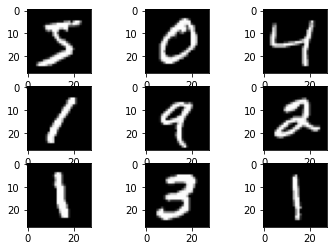

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

In [ ]:
#chuẩn hoá
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000, 100)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000, 100)


In [ ]:
#tạo mô hình CNN
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(28,28,1)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_79 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                

In [ ]:
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 7s 13ms/step - loss: 0.2647 - accuracy: 0.9198 - val_loss: 0.0550 - val_accuracy: 0.9827
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0334 - val_accuracy: 0.9883
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0253 - val_accuracy: 0.9912
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0235 - val_accuracy: 0.9924
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0310 - val_accuracy: 0.9896
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0276 - val_accuracy: 0.9915
Epoc

In [ ]:
model.save('MNIST_CNN.h5')

Sai số kiểm tra là:  0.029678398743271828
Độ chính xác kiểm tra là:  0.9944000244140625


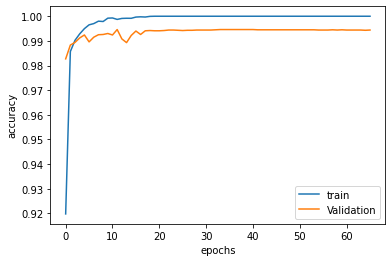

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()